# ML Lab - Midterm: Kernel Regression (20 marks)

Use the provided `diabetes_dataset.csv` (10 features + `target`). Write clean, well-commented code.

You may **not** access the internet during the exam. Set `random_state=42` where asked.

In this problem, you will perform Gaussian kernel regression using the following formula:

<img src="Kernel_Function.png" alt="alt text for screen readers" width="50%">



where $x_i$ is the $i$-th training sample and $y_i$ is the corresponding target value; $M$ is the total number of training samples, and $y^*$ is the prediction for the test sample $x^*$; the exponential functions denote a Gaussian kernel with variance $\sigma^2$.

## Tasks (20 marks total)


In [438]:
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### Task 1: Load the Diabetes Dataset  (1 Mark)
- Load the **diabetes dataset**.  
- Note: The dataset the dataset is provided as a **CSV file**. 
  


In [439]:
# Solution
from sklearn.datasets import load_diabetes
df = load_diabetes(scaled=False)
# this is to test on iris dataset
# from sklearn.datasets import load_iris
# df = load_iris()

In [440]:
df.data.shape # verifying the shape

(442, 10)

In [441]:
df_data = pd.DataFrame(df.data)


In [ ]:
df_data = df_data.drop([1], axis = 1)
df_data = df_data.values
df_data.shape

### Task 2: Train-Test Split  (1 Mark)
- Split the dataset into **training (80%)** and **testing (20%)** sets.  
- Set `random_state=42`

In [444]:
# Solution
from sklearn.model_selection import train_test_split
train_x, test_x, train_y,test_y = train_test_split(df_data,df.target,test_size=0.2,random_state=42) #splitting the dataset

### Task 3: Standardization of Features (2 Marks)
- Standardize the features using **StandardScaler** from *scikit-learn* (`sklearn.preprocessing`).


In [445]:
# Solution
# already done
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)# scaling the train_dataset
test_x = scaler.transform(test_x)# scaling test with the same parameters

In [446]:
train_x # checking if the dataset is scaled

array([[ 1.49836523,  1.06136988,  0.21990201, ...,  0.71103773,
         0.54748197, -0.06144896],
       [-0.22885822,  1.06136988, -0.41936607, ...,  1.4842858 ,
        -0.01975653,  0.36723647],
       [ 0.08518241, -0.94217861,  1.01898711, ..., -0.06221033,
         0.3312366 , -0.31866022],
       ...,
       [ 0.63475351, -0.94217861, -0.46502808, ..., -0.83545839,
        -0.25375196, -0.06144896],
       [-0.30736838, -0.94217861, -0.53352109, ..., -0.06221033,
        -0.83072436, -0.83308273],
       [-2.03459183, -0.94217861,  0.56236706, ..., -0.83545839,
        -0.13312789, -0.06144896]])

### Task 4: Kernel Regression Implementation  (7 Marks)
- Implement **kernel regression** using the above **given formula** (Gaussian kernel).  
- Use the value of **parameter (σ)** as 1.02836.  

In [447]:
# Solution

class KernalRegression:
    def __init__(self,sigma = float(1.02836)):#hardcoding value of sigma
        self.sigma = sigma                  #initializing sigma
    def fit(self,x,y):
        self.data = x                       #initializing data
        self.num_examples = x.shape[0]      #storing number of examples for training, might be required in future
        self.targets = y                    #initializing targets
    def predict(self,x_test):
        predictions = []                    #list to store predictions
        total = x_test.shape[0]             #total number of predictions we have to make
        for i in range(total):
            curr = self.numer(x_test[i])/self.denom(x_test[i]) 
            predictions.append(curr)        # we calculated the numerator and denominator of the model seperately for code clarity
        return predictions

    def edn(self,xi,x): ## edn = e^(-(x-xi))
        return np.exp(-(np.sum(np.square(x-xi)))/(2*self.sigma**2)) # this is the function to compute the e raised to the power something

    def denom(self,x):
        den = 1e-9 ## for safety
        for i in range(self.num_examples):
            den = den + self.edn(x,self.data[i])# calculating denominator of prediction
        return den
    def numer(self,xi):
        numer = 0
        for i in range(self.num_examples):
            numer += self.edn(xi,self.data[i])*self.targets[i]
        return numer                        # calculating numerator of prediction


### Task 5: Prediction and Evaluation  (3 Marks)
- Perform predictions on the **test set** using your kernel regression model and the given **sigma**.  
- Report **Mean Squared Error (MSE)** and **R² score** on the test set.  


In [448]:
model = KernalRegression() # initializing the model

In [449]:
model.fit(train_x,train_y) #storing the dataset values, keep in mind it's not a required step
                           # we are doing this for convinience, data will anyways be used for every prediction


In [450]:
preds = model.predict(test_x) # making predictions

In [451]:
preds       #viewing the predictions

[156.9891278196588,
 154.12777509175885,
 159.3097885987733,
 234.05340953630628,
 146.87477966873146,
 133.30679976398918,
 244.0718746010126,
 178.77873467927878,
 99.63605205738403,
 119.69920096323445,
 115.05351806833238,
 136.03907262953427,
 102.91791218795873,
 195.60660715943519,
 103.20382054762466,
 114.06696863260566,
 223.13427717277486,
 234.3471416424285,
 174.28744474184413,
 202.95881595157547,
 165.18114776584,
 110.16086575836098,
 96.33704782086423,
 183.96922930305382,
 139.25348782199345,
 150.21198780461566,
 176.08815627305398,
 161.82699699439917,
 87.01798894696135,
 134.595742062252,
 160.29057005812896,
 132.1309948765662,
 128.68363687162307,
 170.0740424683015,
 159.81257823136113,
 195.09460157707247,
 122.67029933307282,
 142.2075757189327,
 169.24945074073062,
 92.22329258115029,
 100.17371440077662,
 111.76534672500425,
 145.85234980308476,
 155.6026869277431,
 173.57133531152226,
 97.07344803741627,
 103.83222651248211,
 100.91408437289262,
 95.606447

In [452]:
# Solution
from sklearn.metrics import mean_squared_error,r2_score

mse_error = mean_squared_error(test_y,preds) #calculating the metrics
r2score = r2_score(test_y,preds)

In [453]:
print(f'mse error is {mse_error}')
print(f'mse error is {r2score}')
# we are getting very bad r2score, this could be due to dataset, running the exact same code on iris dataset we get r2score of 0.89

mse error is 2967.164081757936
mse error is 0.43996242036882105


### Task 6: Scatter Plot of Predictions  (2 Marks)
- Show a scatter plot of **Predicted values vs. Ground truth values**. 

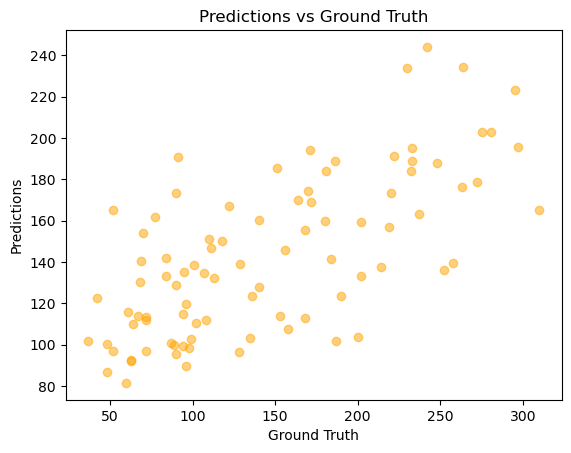

In [454]:
plt.scatter(test_y, preds, alpha=0.5, color="orange") #initializing the plot
plt.xlabel("Ground Truth")                            # changing the  label names
plt.ylabel("Predictions")
plt.title("Predictions vs Ground Truth")
plt.show()

### Task 7: Model Type and Justification  (1.5 + 2.5 = 4 Marks)
- What type of regression model have you implemented?  
- **Justify your answer**   

In [455]:
# Solution
# Answer --> This is a non-parametric regression model
# Reason --> We are not storing any model trained on the the train_dataset, 
#            We are using the dataset again and again everytime for inference everytime unlike naive bayes for example
#            where we stored the distributions by calculating them by training dataset


## Submission Guidelines

- All code must be well commented for clarity  
- All plots must be properly labeled  
- Both .ipynb and .py files must be submitted to receive credit. The submission should be uploaded in a single .zip file named YourRollNumber_midsem.zip.  
- The individual files within the .zip should be named YourRollNumber_midsem.py and YourRollNumber_midsem.ipynb  
